In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram

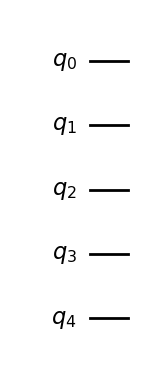

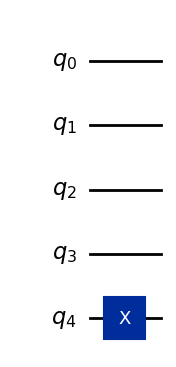

In [7]:
# 4 Qubits Constant Oracle box

# 0
constant_oracle_0 = QuantumCircuit(5)
display(constant_oracle_0.draw('mpl'))

# 1
constant_oracle_1 = QuantumCircuit(5)
constant_oracle_1.x(4)
display(constant_oracle_1.draw('mpl'))


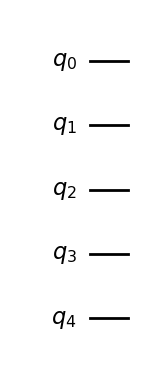

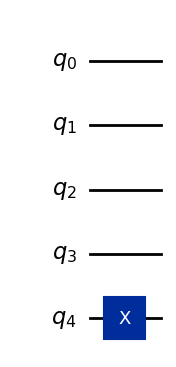

In [7]:
# 4 Qubits Constant Oracle

# 0
constant_oracle_0 = QuantumCircuit(5)
display(constant_oracle_0.draw('mpl'))

# 1
constant_oracle_1 = QuantumCircuit(5)
constant_oracle_1.x(4)
display(constant_oracle_1.draw('mpl'))


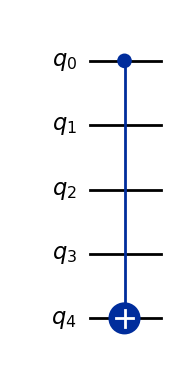

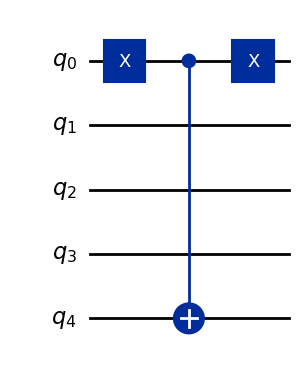

In [32]:
# 4 Qubits Balanced Oracle

# Identity
balanced_oracle_identity = QuantumCircuit(5)
balanced_oracle_identity.cx(0, 4)

display(balanced_oracle_identity.draw('mpl'))

# inverted

balanced_oracle_inverted = QuantumCircuit(5)
balanced_oracle_inverted.x(0)
balanced_oracle_inverted.cx(0, 4)
balanced_oracle_inverted.x(0)

display(balanced_oracle_inverted.draw('mpl'))


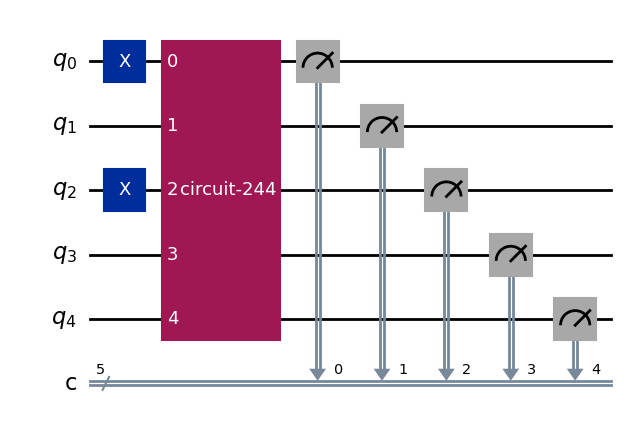

Counts :  {'00101': 1024}


In [33]:
# Test the Oracle box

def createCircuit(oracle):
    qc = QuantumCircuit(5, 5)
    qc.x(0)
    qc.x(2)
    
    qc.append(oracle.to_gate(), [0, 1, 2, 3, 4])
    
    qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
    display(qc.draw('mpl'))
    return qc

def simulateCircuit(qc):
    sim = AerSimulator()
    qc_transpiled = transpile(qc, sim)
    result = sim.run(qc_transpiled, shots=1024).result()
    counts = result.get_counts()
    print("Counts : ", counts)
    
qc = createCircuit(balanced_oracle_inverted)
simulateCircuit(qc)

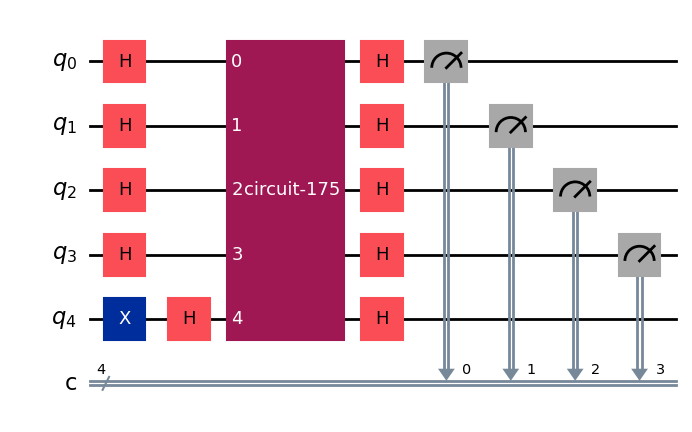

Counts :  {'0000': 1024}


In [47]:
deutsch_jozsa_qc = QuantumCircuit(5, 4)
deutsch_jozsa_qc.x(4)
deutsch_jozsa_qc.h([0, 1, 2, 3, 4])

deutsch_jozsa_qc.append(constant_oracle_0.to_gate(), [0, 1, 2, 3, 4])
deutsch_jozsa_qc.h([0, 1, 2, 3, 4])


deutsch_jozsa_qc.measure(range(4) , range(4))
display(deutsch_jozsa_qc.draw('mpl'))

simulateCircuit(deutsch_jozsa_qc)